Challenge-1

Design python script for implementing k-means algorithm with Euclidean distance to cluster the following 8 data points into 3 clusters: 

A1=(2,10), A2=(2,5), A3=(8,4), A4=(5,8), A5=(7,5), A6=(6,4), A7=(1,2), A8=(4,9) by assuming the initial seeds (centers of each cluster) are A1, A4 and A7.

Note: The final clusters as follows:
Cluster-0:{A1, A4, A8), Cluster-1:{A2, A7), Cluster-3:{A3, A5, A6)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.DataFrame({
    'x': [2,2,8,5,7,6,1,4],
    'y': [10,5,4,8,5,4,2,9]
})

In [4]:
np.random.seed(200)
k = 3
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0, 10), np.random.randint(0, 10)]
    for i in range(k)
}

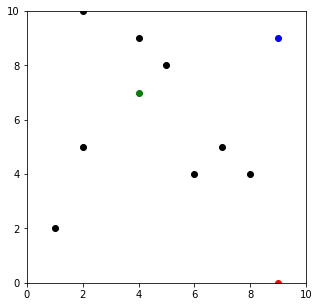

In [5]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

In [6]:
# Assignment Stage

def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

   x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  2  10        12.206556         3.605551         7.071068        2     g
1  2   5         8.602325         2.828427         8.062258        2     g
2  8   4         4.123106         5.000000         5.099020        1     r
3  5   8         8.944272         1.414214         4.123106        2     g
4  7   5         5.385165         3.605551         4.472136        2     g


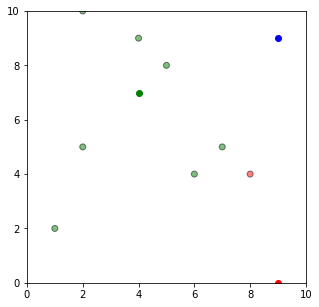

In [7]:
df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

In [8]:
from sklearn.cluster import KMeans

df = pd.DataFrame({
    'x': [2,2,8,5,7,6,1,4],
    'y': [10,5,4,8,5,4,2,9]
})

kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [9]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(df)

In [10]:
y_kmeans3

array([1, 2, 0, 1, 0, 0, 2, 1])